# Bibliotecas

In [4]:
# Import required libraries

# linear algebra and data processing libraries
import numpy as np
import pandas as pd

# scikit-learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preparação e Limpeza dos Dados

Nesta etapa, realizamos o processamento inicial do dataset `boardgames.csv`:

1.  **Carregamento:** Leitura dos dados brutos.
2.  **Seleção de Features:** Filtragem das colunas relevantes para a análise.
3.  **Engenharia de Atributos:** Criação da variável `rating_category` para classificar os jogos baseados na nota média (*average*).

In [5]:
# Load dataset

games_df = pd.read_csv('boardgames.csv')

#Filtrar colunas desnecessárias

cols_to_keep = [
    'primary',
    'yearpublished',
    'minplayers',
    'maxplayers',
    'minplaytime',
    'minage',
    'boardgamecategory',
    'boardgamemechanic',
    'boardgamefamily',
    'boardgamedesigner',
    'boardgameartist',
    'boardgamepublisher',
    'usersrated',
    'bayesaverage',
    'playingtime',
    'averageweight',
    'average'
]

games_df = games_df[cols_to_keep]

# Definição dos Novos Limites (Bins) e Rótulos (Labels)
bins = [0, 4, 6.2, 7.5, 10.1]
labels = ['bad', 'mediocre', 'good', 'excelent']

# Criação da nova coluna 'rating_category'
games_df['rating_category'] = pd.cut(
    games_df['average'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

print("Nr. rows - train: ", len(games_df))

Nr. rows - train:  21632


# Unsupervised Clustering(K-Means)

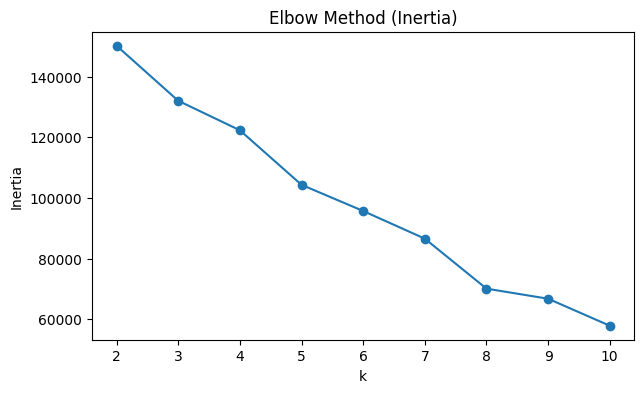

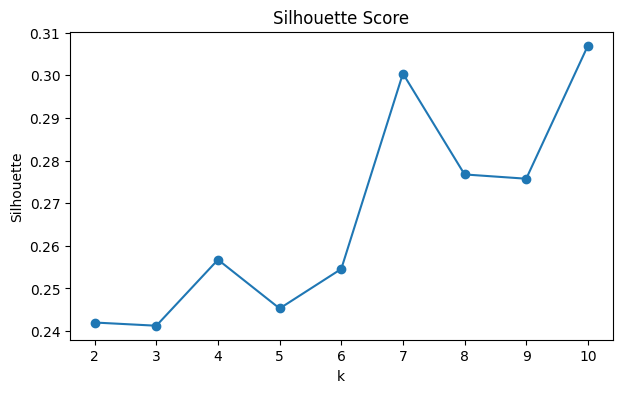

K sugerido (por silhouette): 10

--- Nº de elementos por cluster ---
cluster
0    1260
1    7026
2     204
3       3
4    1630
5    8502
6     282
7       1
8      31
9    2692
Name: count, dtype: int64

--- Estatísticas numéricas por cluster (mean, std, min, max) ---


yearpublished                         minplayers                    \
                 mean         std   min   max       mean       std min max   
cluster                                                                      
0         2003.507937   36.085845  1400  2021   1.822222  0.576325   0   4   
1         2005.471534   21.312495  1300  2023   1.756618  0.471511   0   3   
2          -81.068627  535.741883 -3500   762   2.044118  0.820318   0   8   
3         2009.333333    4.932883  2006  2015   2.000000  0.000000   2   2   
4         2010.689571   19.335190  1587  2021   1.807975  0.575164   1   4   
5         2004.911903   32.797800  1000  2023   1.876147  0.331924   0   2   
6         2006.372340   36.846025  1475  2020   1.921986  0.731312   1   5   
7         1979.000000         NaN  1979  1979   8.000000       NaN   8   8   
8         2009.483871    5.790055  1995  2019   1.935484  0.512216   1   3   
9         2007.284918   18.812739  1600  2022   3.285661  0.716977   1  10   

         maxplayers             ... usersrated           averageweight  \
               mean        std  ...        min       max          mean   
cluster                         ...                                      
0          4.143651   7.652760  ...       30.0    2164.0      2.277114   
1          4.135212   4.850968  ...       30.0    5619.0      2.667908   
2          6.607843  12.264456  ...       30.0   15516.0      1.611315   
3        999.000000   0.000000  ...       87.0     268.0      1.061267   
4          4.600000   4.541683  ...      551.0   14718.0      2.550740   
5          5.757351   9.441992  ...       29.0   16508.0      1.370035   
6          6.088652   9.996936  ...     9449.0   43759.0      2.499757   
7         10.000000        NaN  ...      154.0     154.0      4.711900   
8          4.677419   1.423308  ...    43064.0  109006.0      2.397013   
9          9.867385  17.403059  ...       29.0   18052.0      1.585661   

                                  bayesaverage                              
              std     min     max         mean       std      min      max  
cluster                                                                     
0        0.907459  0.0000  4.8889     5.570217  0.115509  5.27587  6.32831  
1        0.624825  1.0000  5.0000     5.628250  0.150126  5.12345  6.33428  
2        0.799973  0.0000  4.3529     5.510672  0.304515  3.57475  7.31782  
3        0.062536  1.0000  1.1250     5.569677  0.022870  5.54821  5.59373  
4        0.741606  1.0251  4.8150     6.537732  0.334093  5.62137  7.84361  
5        0.469999  0.0000  2.7143     5.553739  0.194698  0.00000  6.32113  
6        0.853534  1.0284  4.4131     7.213492  0.503433  4.30397  8.41823  
7             NaN  4.7119  4.7119     5.527570       NaN  5.52757  5.52757  
8        0.752995  1.1914  3.8699     7.589332  0.443604  6.68775  8.51055  
9        0.614885  0.0000  3.8529     5.595941  0.207859  0.00000  6.79656  

[10 rows x 32 columns]

In [ ]:

cluster_features = [
    "yearpublished",
    "minplayers",
    "maxplayers",
    "playingtime",
    "minage",
    "usersrated",
    "averageweight",
    "bayesaverage"  
]

kdf = games_df[cluster_features].dropna().copy()

scaler = StandardScaler()
X = scaler.fit_transform(kdf)

inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X)

    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(7,4))
plt.plot(list(K), inertias, marker="o")
plt.title("Elbow Method (Inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(7,4))
plt.plot(list(K), sil_scores, marker="o")
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

best_k = int(np.argmax(sil_scores)) + 2  # porque K começa em 2
print("K sugerido (por silhouette):", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
kdf["cluster"] = kmeans.fit_predict(X)

print("\n--- Nº de elementos por cluster ---")
print(kdf["cluster"].value_counts().sort_index())

print("\n--- Estatísticas numéricas por cluster (mean, std, min, max) ---")
cluster_stats = kdf.groupby("cluster")[cluster_features].agg(["mean","std","min","max"])
cluster_stats
